<a href="https://colab.research.google.com/github/Trisinus123/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Trisinus Gulo

Kelas : TI-3C

Absen : 28

Nim : 2141720035

In [40]:
# Nomor 1
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengimport beberapa Library

In [41]:
# No 2
import cv2 as cv
from google.colab.patches import cv_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

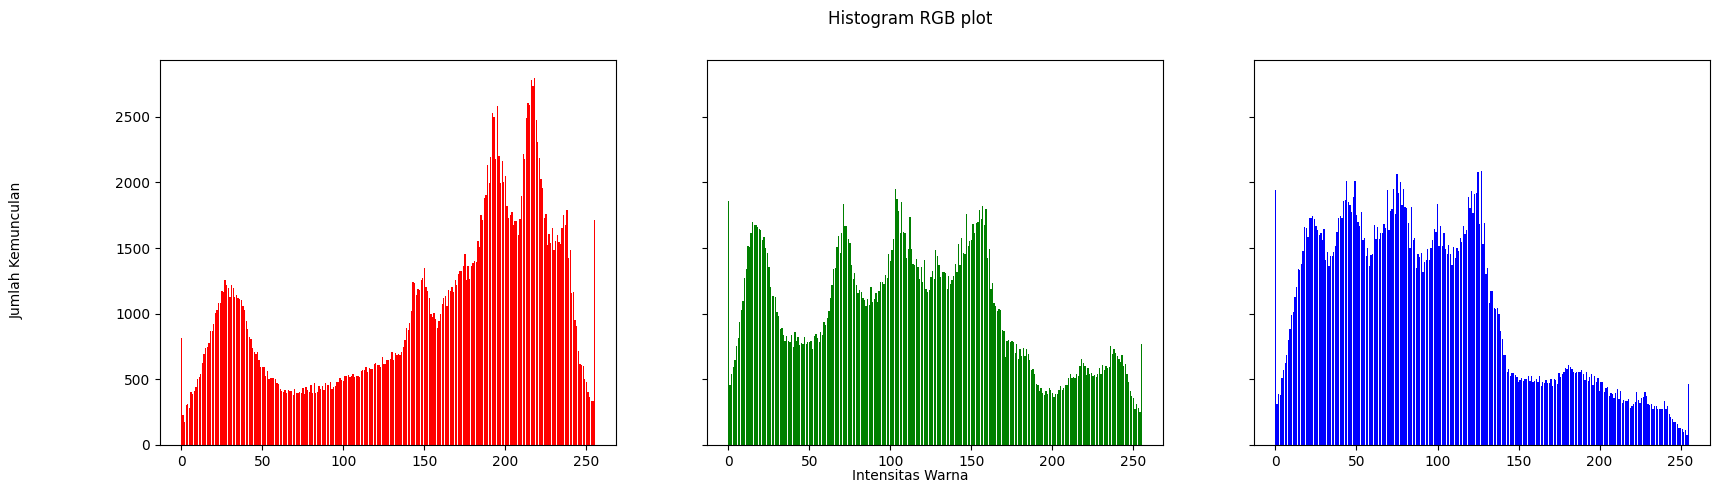

In [42]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

- Penggunaan numpy histogram menampilkan hasil yang sama dengan penggunaan function sebelumnya

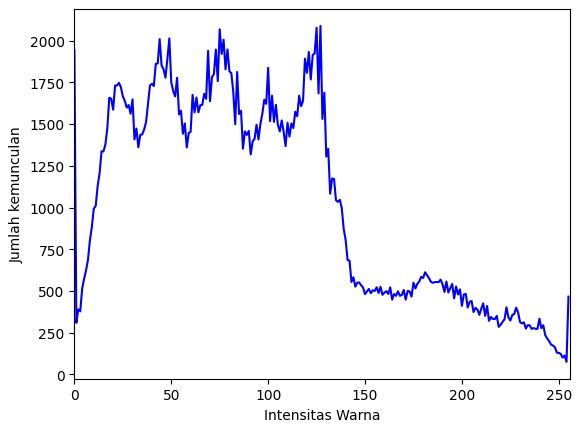

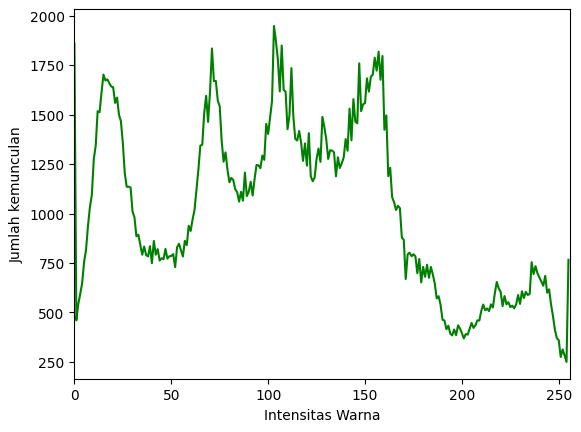

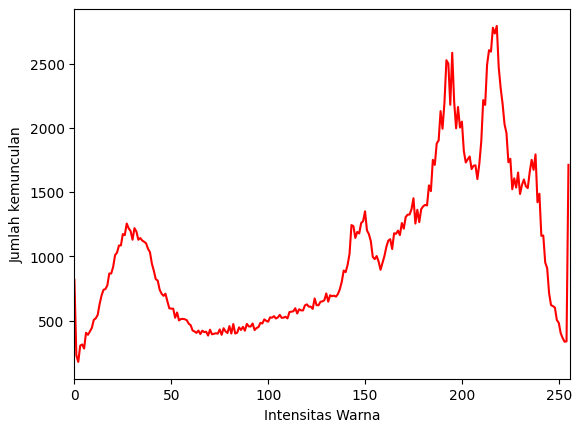

In [43]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

colors = ('b','g','r')
channel_ids = (0, 1, 2)

for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.xlim([0,256])
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

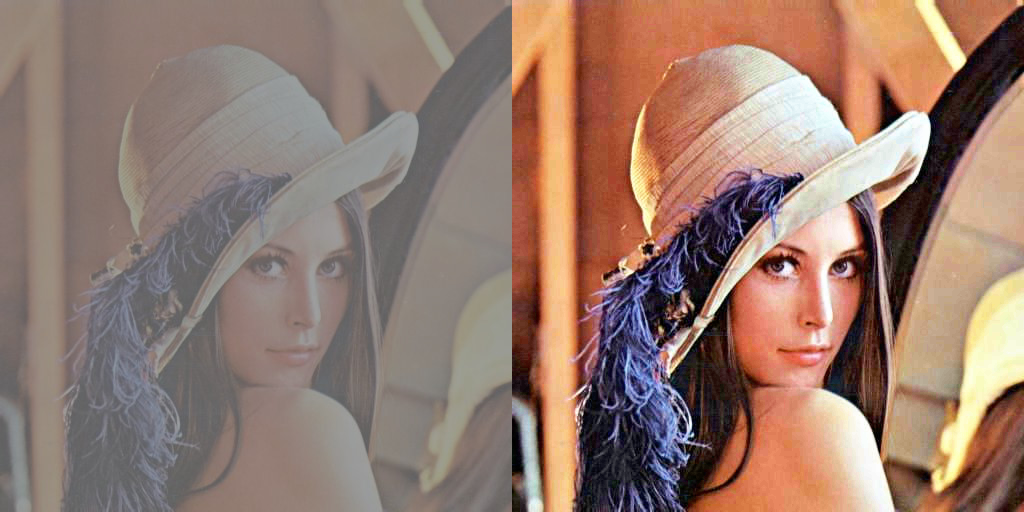

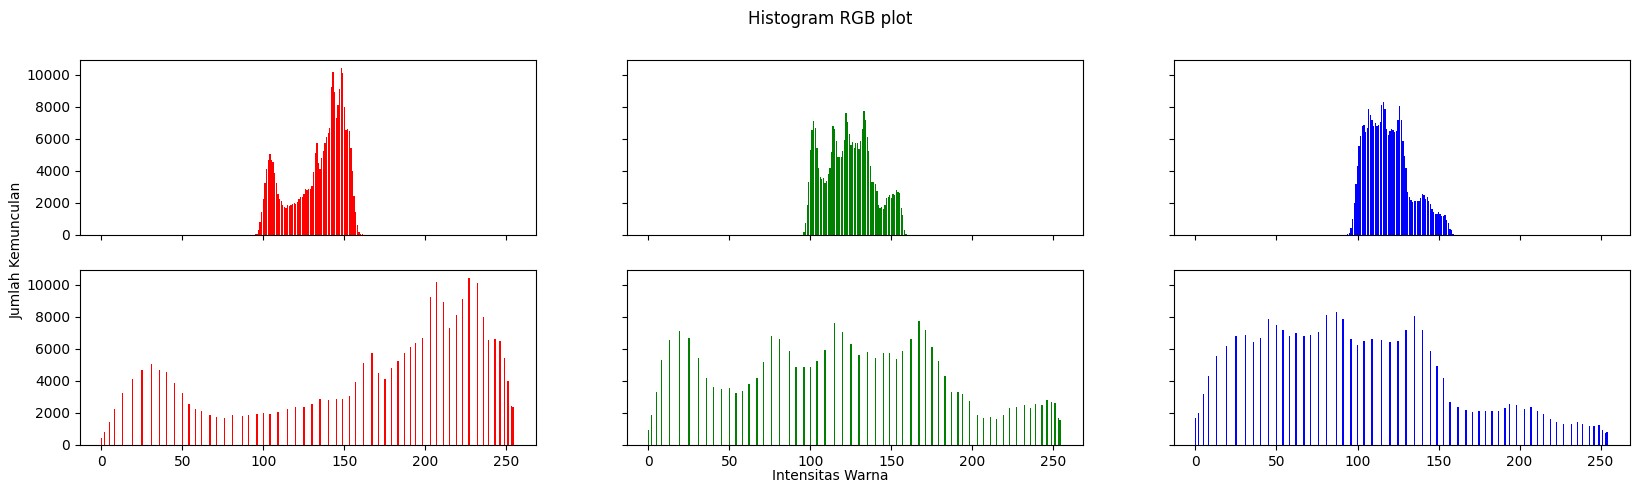

In [44]:
img = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histo_asli = histog(img)

#convert to Numpy array
img_array = np.asarray(img)

#STEP 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#STEP 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2)) #concatenate image
cv_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=Trbe, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

- EqualizeHist pada CV2 memberikan hasil yang sama dengan menggunakan function yang dibuat diatas

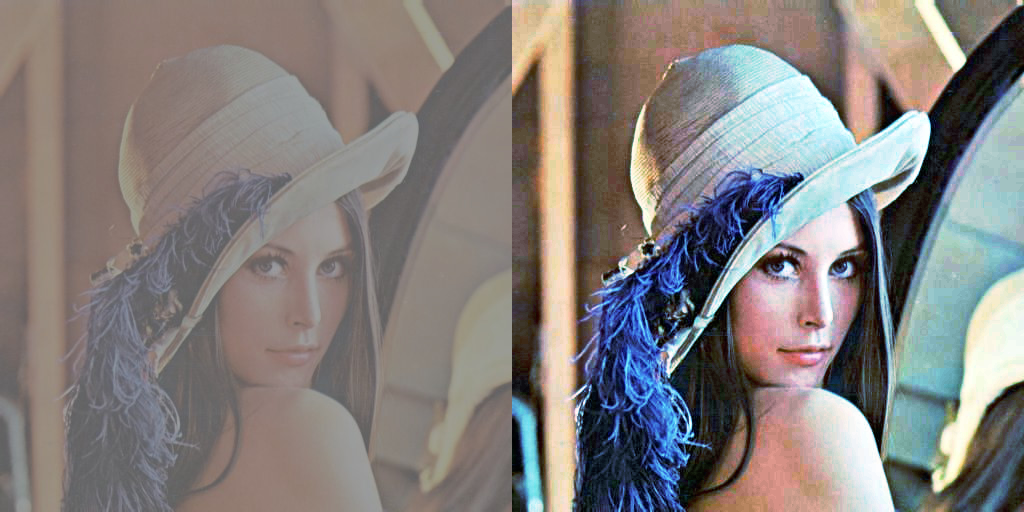

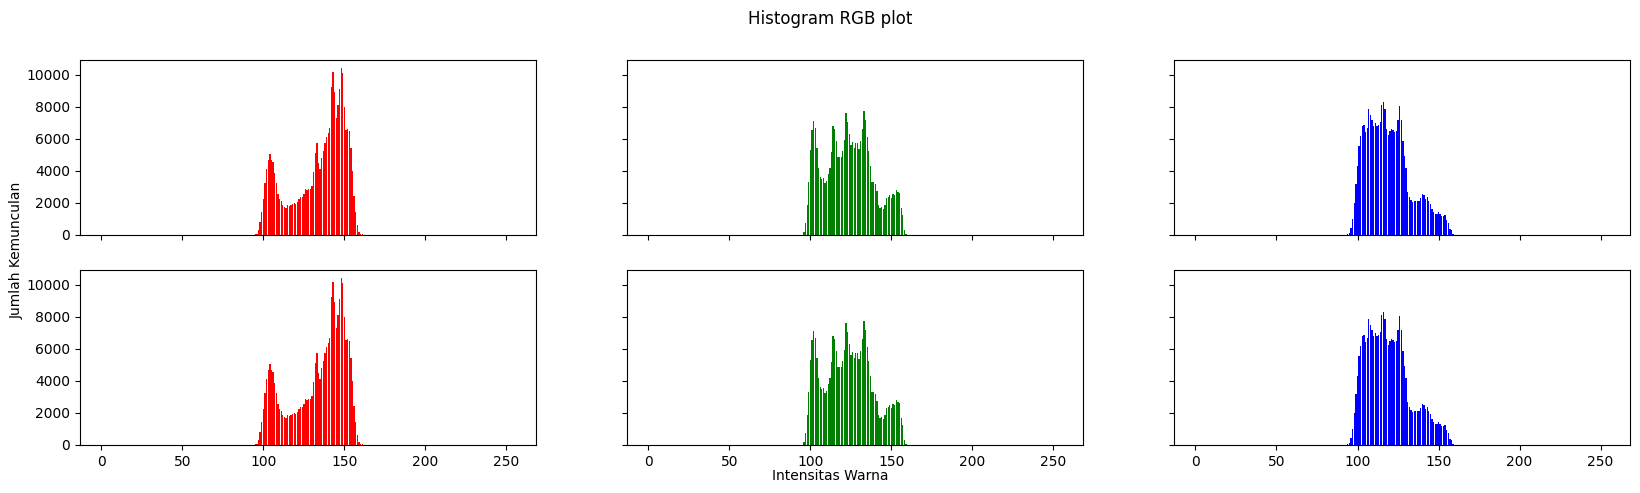

In [45]:
img = cv.imread('/content/drive/MyDrive/Images/lena_lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

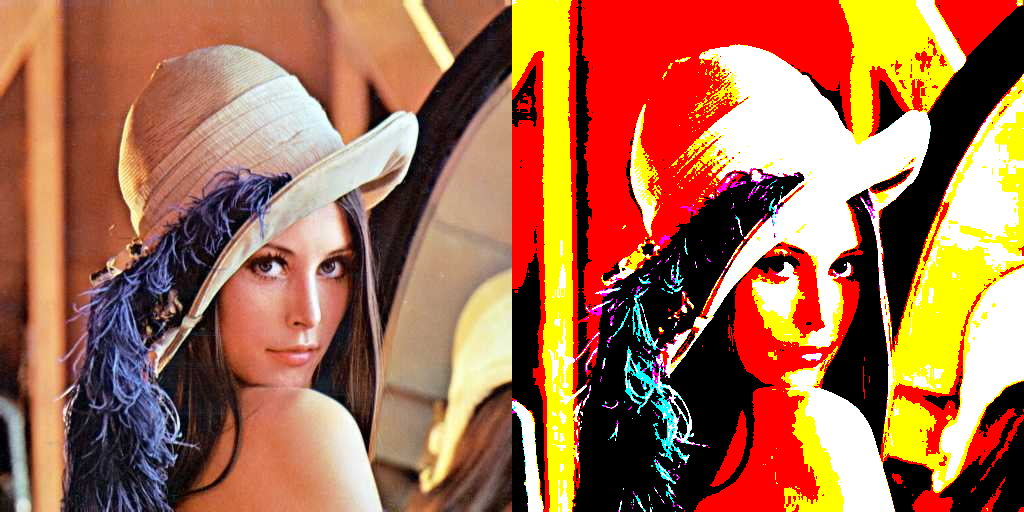

In [46]:
img = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

colors = {
    'hitam': (0, 0, 0),
    'hijau': (0, 255, 0),
    'kuning': (255, 255, 0),
    'biru': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'putih': (255, 255, 255)
}

def cari_warna_terdekat(rgb_color):
    min_dist = float('inf')
    nearest_color = None
    for color, target_rgb in colors.items():
        dist = np.linalg.norm(np.array(rgb_color) - np.array(target_rgb))
        # dist = (np.sum((np.array((rgb_color) - np.array(target_rgb)) ** 2)))**0.5 # Eclidean Norm
        if dist < min_dist:
            min_dist = dist
            nearest_color = color
    return nearest_color

def ubah_warna(image):
  new_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_color = tuple(image[y, x])
        nearest_color = cari_warna_terdekat(pixel_color)
        new_image[y, x] = colors[nearest_color]

  return new_image

new_image = ubah_warna(img)

final_frame = cv.hconcat((img, new_image))
cv_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

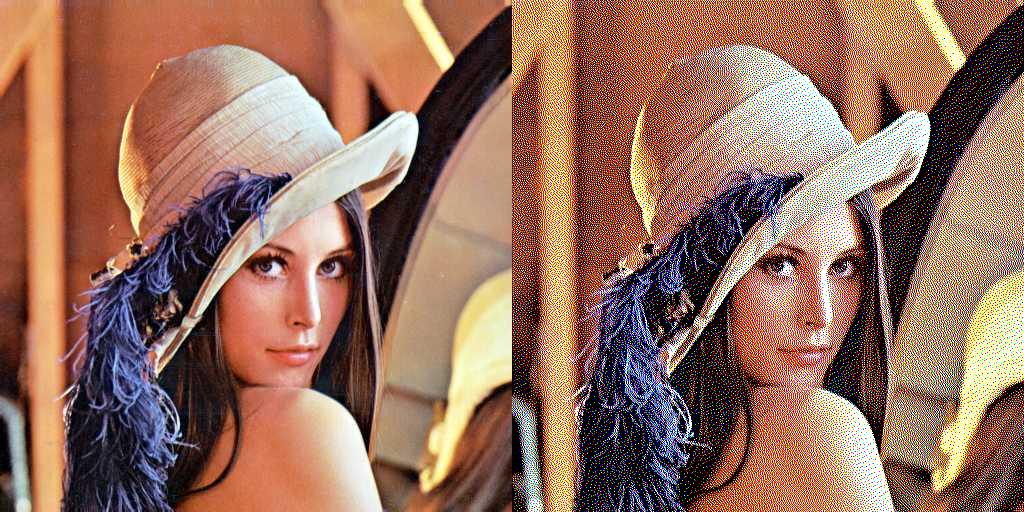

In [47]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img2 = cv.imread('/content/drive/MyDrive/Images/lena.jpg')

def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  # Looping setiap pixel citra
  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):
        # Jarak pixel tetangga
        pixel_old = image[y, x, c]

        # Menghitung pixel baru berdasar jarak dan juga batasan warna yang dimiliki
        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        # Lakukan untuk semua channel warna
        # Implementasi rumus dithering Floyd and Steinberg (R1-R4)
        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img3 = np.copy(img2)

dithering_image = floyd_steinberg_dithering(img3)
final_frame = cv.hconcat((img2, dithering_image))
cv_imshow (final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

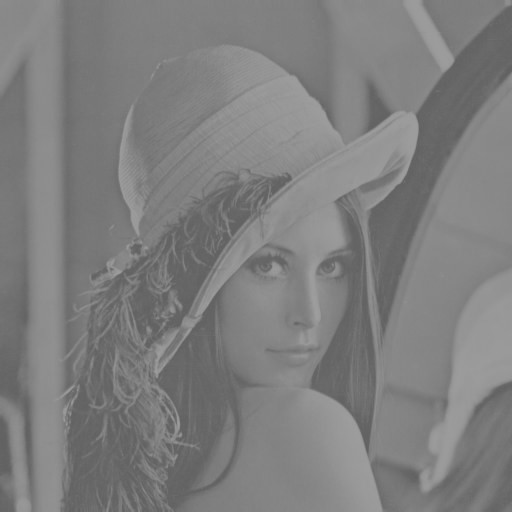

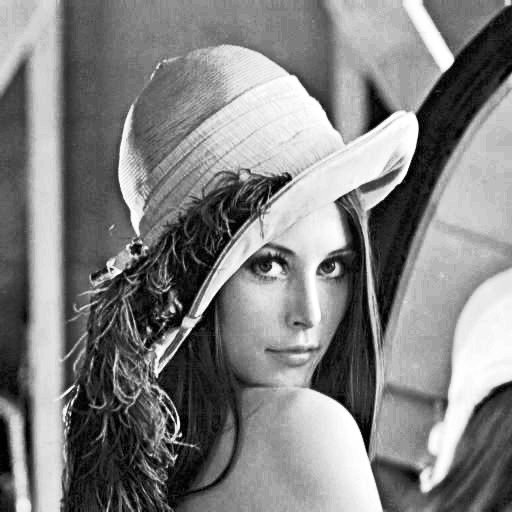

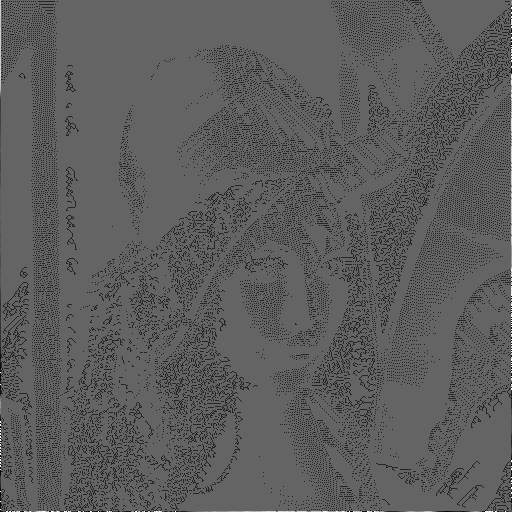

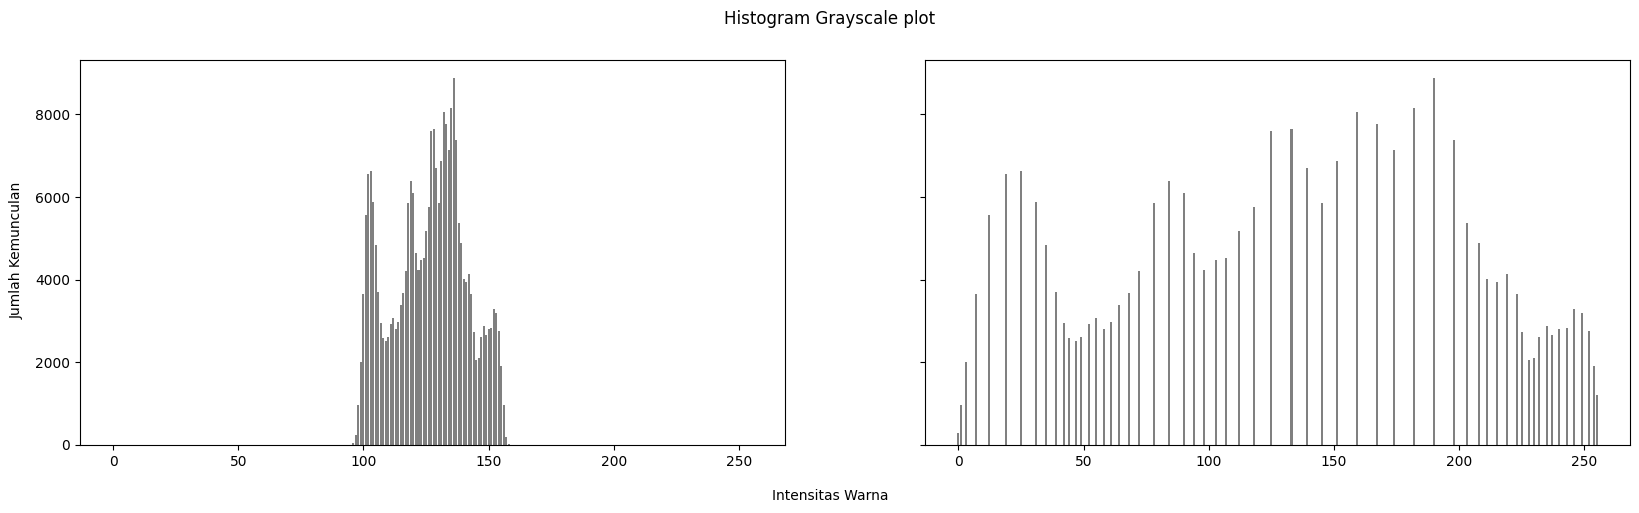

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra asli
image = cv.imread("/content/drive/MyDrive/Images/lena_lc.jpg", cv.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv_imshow(image)
cv_imshow(equalized_image)
cv_imshow(dithered_image)

plt.show( )